In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import helper

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-tcpu6q5x because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# You have been tasked to work as a consultant!


![image.png](lake.png)

### Your challenge:

Upper Lake has a volume of $50 \, \rm km^3$ and Lower Lake a volume of  $100 \, \rm km^3$. A river flows into Upper Lake, then connects the two lakes, and then flows out of Lower Lake. The river has a flow rate of $3 \, \rm km^3$ per day.

Suppose $2 \, \rm m^3$ of a pollutant was spilled into Upper Lake. The Beach Resort, located on the shore of Lower Lake, has hired you as a consultant. They want to know whether they need to close the beach.

According to health guidelines, if the concentration of this particular chemical exceeds $0.008$ ppb (parts per billion), then the beach must be closed for swimming and any other recreational activity. 

Do you think the Resort will need to close the beach? If so, for how long will be beach need to be closed?

### The discrete model:

We will define the state vector ${\bf p}$ as:

$$ {\bf p} = \begin{bmatrix} x \\ y \end{bmatrix} $$

where $x$ is the amount of pollutant in Upper Lake and $y$ is the amount of pollutant in Lower Lake, both measured in $\rm m^3$. 

We can model this dynamical system using a discrete formulation, where the time interval represents **one day**. 

**For the Upper Lake, the amount of pollutant tomorrow ($x_{n+1}$) is equal to the amount of pollutant today ($x_{n}$) minus the amount of pollutant that flows into the Lower Lake via the river.**

Since the concentration of pollutant today is $\frac{x_n}{50} \frac{\rm m^3}{\rm km^3}$ and the amount of water carried to the Lower Lake in one day is $3 \rm km^3$, then the amount of pollutant that flows to Lower Lake per day is $\frac{3\,x_n}{50} \rm m^3$, which gives us the expression:

$$x_{n+1}  =   x_n - \frac{3}{50} x_n$$

**For the Lower Lake, the amount of pollutant tomorrow ($y_{n+1}$) is equal to the amount of pollutant today ($y_{n}$), plus the amount of pollutant that comes from the Upper Lake, minus the amount of pollutant that leaves the Lower Lake via the river.**


Since the concentration of pollutant today is $\frac{y_n}{100} \frac{\rm m^3}{\rm km^3}$ and the amount of water that leaves the Lower Lake in one day is $3 \rm km^3$, then the amount of pollutant that flows out of the Lower Lake is $\frac{3\,y_n}{100} \rm m^3$ per day. Combined with the above expression we have the following dynamical system:

$$
\begin{eqnarray}
x_{n+1} & =  & x_n - \frac{3}{50} x_n \\
y_{n+1} & = & y_n + \frac{3}{50} x_n - \frac{3}{100} y_n
\end{eqnarray}
$$

### Continuous model

The dynamical system above can also be written as a continuous function of the time $t$. This will be more realistic, since now the time $t$ could consider smaller increments, such as hours instead of days. We will however continue our analysis assuming $t$ is given in units of days. The continuous system is expressed as:

$$
\begin{eqnarray}
\frac{dx}{dt}(t) & =  &  - \frac{3}{50} x(t)  \qquad \textrm(1) \\
\frac{dy}{dt}(t) & = &  \frac{3}{50} x(t) - \frac{3}{100} y(t) \qquad \textrm(2)
\end{eqnarray}
$$

with initial condition $x(0) = 2$ and $y(0) = 0$. We can write the above equations in matrix format:

$$ \begin{bmatrix} \frac{dx}{dt} \\ \frac{dy}{dt} \end{bmatrix} = {\bf A} \begin{bmatrix}x \\ y\end{bmatrix} \qquad \textrm{or} \qquad {\bf x}^\prime = {\bf Ax} $$

Define the transition matrix ${\bf A}$ as the variable `A`.


In [2]:
#grade (DO NOT DELETE THIS LINE!)
A=np.array([[-3/50, 0],[3/50,-3/100]])

Compute the eigenvalues and eigenvectors of the transition matrix, storing the respective results as a 1d numpy array `eigvals` and a 2d numpy array `eigvecs` with eigenvectors as columns in the same ordering as the eigenvalues. The eigenvectors should be normalized with respect to the Euclidean norm, which is the default return state from the function `numpy.linalg.eig` as in lab.

In [3]:
#grade (DO NOT DELETE THIS LINE!)
eigvals, eigvecs = la.eig(A)
print(eigvals)
print(eigvecs)

[-0.03 -0.06]
[[ 0.          0.4472136 ]
 [ 1.         -0.89442719]]


The exact solution for this dynamical system is:

$${\bf x}(t) = {\bf x_1}c_1e^{\lambda_1 t} + {\bf x_2}c_2e^{\lambda_2 t} \qquad \textrm(3)$$

where ${\bf x_1}$ and ${\bf x_2}$ are eigenvectors corresponding to the eigenvalues $\lambda_1$ and $\lambda_2$. Use the initial conditions to determine the values of $c_1$ and $c_2$. Store them respectively as `c1` and `c2`:

In [4]:
#grade (DO NOT DELETE THIS LINE!)
x_0 = np.array([2,0])
c = la.solve(eigvecs, x_0)
c1, c2 = c[0], c[1]

We will discretize the time using a period of 60 days:

In [5]:
start_time = 0
end_time = 60
t = np.arange(start_time, end_time+1)

Obtain the amount of pollutant in Upper Lake and Lower Lake for each day in `t`, and store this result in the vector `xdays`, with shape `(61,2)`. The first column corresponds to $x$ and the second corresponds to $y$. Each row $i$ corresponds to time $t[i]$.

**Note:** You are expected to obtain this solution using the numerical approach based on the eigen solution. **You are NOT supposed to use the solutions from the helper file** (the reason we are importing the file here is so that you can use one of the plot functions).

In [6]:
#grade (DO NOT DELETE THIS LINE!)
x1, x2 = eigvecs[:,0], eigvecs[:,1]
lambda1, lambda2 = eigvals[0], eigvals[1]
xdays = np.zeros((len(t), 2), dtype=np.float64) # (61, 2)
for i in range(len(t)):
    xdays[i,:] = x1 * c1 * np.exp(lambda1 * t[i]) + x2 * c2 * np.exp(lambda2 * t[i])

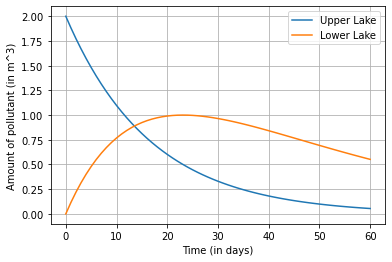

In [7]:
plt.plot(t,xdays[:,0], label="Upper Lake")
plt.plot(t,xdays[:,1], label="Lower Lake")
plt.ylabel("Amount of pollutant (in m^3)")
plt.xlabel("Time (in days)")
plt.legend()
plt.grid()

By inspecting the plot, you can estimate the answers you need for this consultant job:

1) When will Lower Lake have its maximum concentration of pollutant?

2) According to the health guidelines, will the beach need to be closed? If so, during which days?


Now, you will compute the exact answer to the first question. That is, **analytically** find the value of $t$ such that $y(t)$ is maximized and store the result as `tmax`.

*Hint: Recall from calculus that to find a maximum or minimum value of a function $f(t)$, you must identify the critical points by computing the derivative $f'(t)$, then solving $f'(t) = 0$ for $t$. In this case, you may assume that the only critical point of $y(t)$ corresponds to a maximum.*

*Hint: Use your solution ${\bf x}(t)$ from Equation (3) to express $x(t)$ and $y(t)$. Plug these expressions into Equation (2) for $y'(t)$, then solve $y'(t) = 0$ for $t$ by hand (i.e. analytically). You will need to use [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html).*

In [17]:
#grade (DO NOT DELETE THIS LINE!)
# x_t = xdays[:,0]
# y_t = xdays[:,1]
# y_d = (3/50) * x_t - (3/100) * y_t
# min_d = float('inf')
# tmax = 0
# for i in range(y_d.shape[0]):
#     if abs(y_d[i] - 0) < min_d:
#         min_d = abs(y_d[i] - 0)
#         tmax = i
# print(tmax)
# print(np.argmax(y_t))
print(c1 * x1)
print(c2 * x2)
# print(eigvecs)
print(c * eigvecs)
tmax = 23.1049

[0. 4.]
[ 2. -4.]
[[ 0.  2.]
 [ 4. -4.]]


To find the period of time in which the beach is closed, we need to find the days such that the concentration is larger than 0.008 ppb. We use $0.01 \rm ppb = 0.01 \frac{m^3}{km^3}$, because there are $10^9$ cubic meters (or 1 billion) in one cubic kilometers. Since Lower Lake has $100 \rm km^3$ of water, your job is to find the days in which the concentration of pollutant $y(t) > 0.8 \rm m^3$.

From the plot, you can see that there are two values of $t$ which satisfy $y(t) = 0.8$. Make your estimates!
To obtain the exact solution, you would need to use numerical methods, which are beyond the scope of this course. We provide one such solution method below to satisfy any curiosity. :-)

In [9]:
from scipy.optimize import root_scalar # this is a function to find the root of nonlinear equations

# The function below computes yf = y(t) - 0.8 
def yf(t):
    return eigvecs[1,0]*c1*np.exp(eigvals[0]*t) + eigvecs[1,1]*c2*np.exp(eigvals[1]*t) - 0.8

# We will use root_scalar to find the roots of yf, i.e., the value t such that yf(t) = 0
# This choice of method requires an initial interval that contains the solution (bracket)
sol1 = root_scalar(yf,bracket=[0,20],method='bisect')
sol2 = root_scalar(yf,bracket=[20,60],method='bisect')

print(sol1.root)
print(sol2.root)

10.783571038581385
42.864359375888625


We now plot the amount of pollutant in Lower Lake versus the amount of pollutant in Upper Lake for each time step:

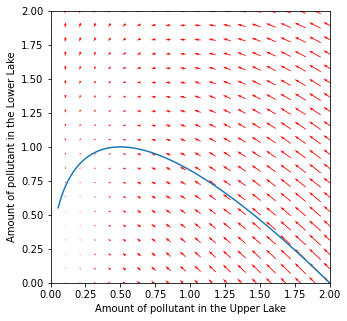

In [10]:
plt.figure(figsize=(5,5))
plt.xlim(0, 2)
plt.ylim(0, 2)
helper.plot_vecfield([0, 2], [0, 2], 20, A)
plt.xlabel("Amount of pollutant in the Upper Lake")
plt.ylabel("Amount of pollutant in the Lower Lake")

plt.plot(xdays[:,0], xdays[:,1])

Notice how as the pollutant in Upper Lake decreases, the pollutant in Lower Lake increases for some time then begins decreasing. Thankfully, a characteristic of this system is that the amount of pollutant in each lake tends to zero as time progresses.